# solar-challenge-week1 Kifiya AIM Project. 

📌 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go


# 📌 2. Load data

In [2]:
file_path = "../data/sierraleone-bumbuna.csv"  # adjust as needed
data = pd.read_csv(file_path,)

# 📌 3. Overview

In [3]:
print("Shape:", data.shape)
data.info()
display(data.describe())

Shape: (525600, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB    

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


# 📌 4. Missing Values

In [4]:
missing = data.isnull().mean().sort_values(ascending=False)
print(data.isna().sum())
print("Missing values (%):\n", missing[missing > 0])

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Missing values (%):
 Comments    1.0
dtype: float64


In [5]:
# Optional: drop columns with > 50% missing
threshold = 0.5
data = data.loc[:, data.isnull().mean() < threshold]

# 📌 5. Outlier Removal

In [6]:
print("Before outlier removal:", data.shape)
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(zscore(data[outlier_cols], nan_policy='omit'))
outliers = (z_scores > 3)
j = 0 
for i, col in enumerate(outlier_cols):
    print(f"{col}: {outliers[:,i].sum()} outliers")
    j += outliers[:,i].sum()

Before outlier removal: (525600, 18)
GHI: 2477 outliers
DNI: 7586 outliers
DHI: 2986 outliers
ModA: 1604 outliers
ModB: 2041 outliers
WS: 3967 outliers
WSgust: 3665 outliers


In [7]:

# Select numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

# Drop rows with NA in numeric columns for z-score calculation
numeric_data_no_na = data[numeric_cols].dropna()

# Calculate z-scores
z_scores = np.abs(zscore(numeric_data_no_na))

# Filter rows where all numeric z-scores < 3
filtered_entries = (z_scores < 3).all(axis=1)

# Now filter the entire original DataFrame (including non-numeric columns),
# but only for the rows that remain after dropna and z-score filtering.
# To do this, we use the index of filtered numeric_data_no_na.
data = data.loc[numeric_data_no_na.index[filtered_entries]]

print("After outlier removal:", data.shape)


After outlier removal: (494636, 18)


# 📌 6. Correlation Heatmap

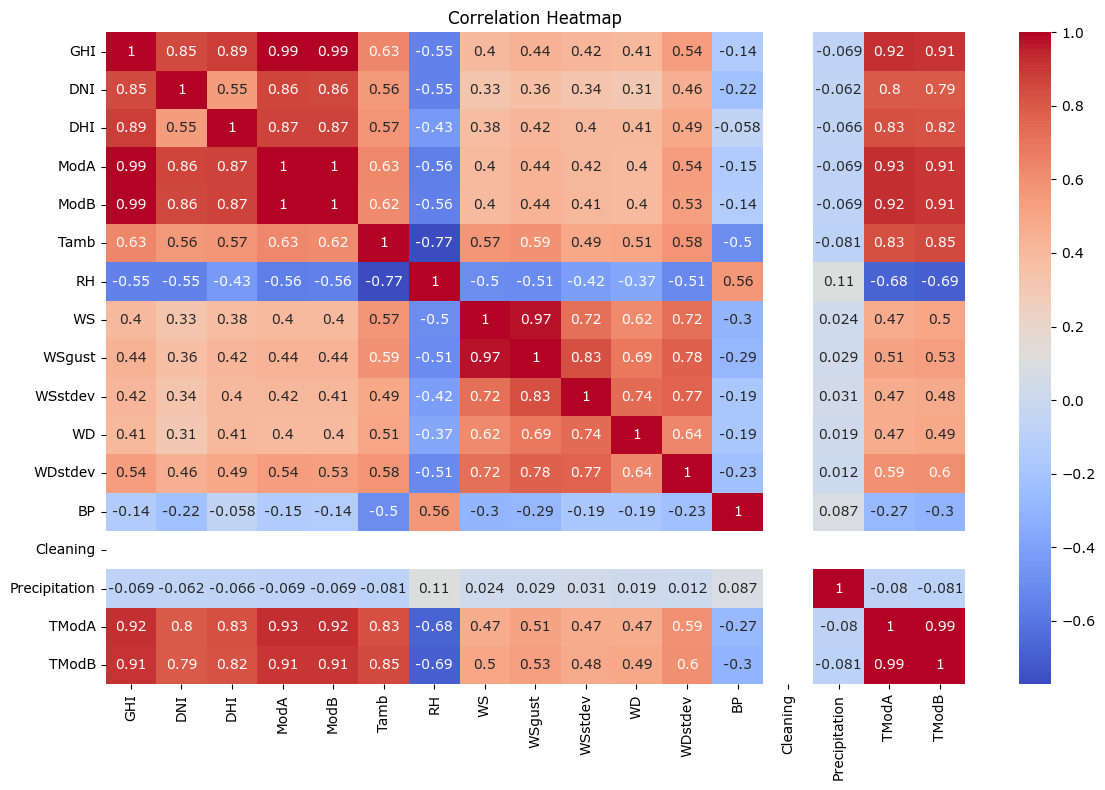

In [8]:
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=np.number)  # select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 📌 7. Time Series Plot (if 'time' or 'date' column exists)

In [9]:
print(data.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')


In [10]:
# Convert 'Timestamp' to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

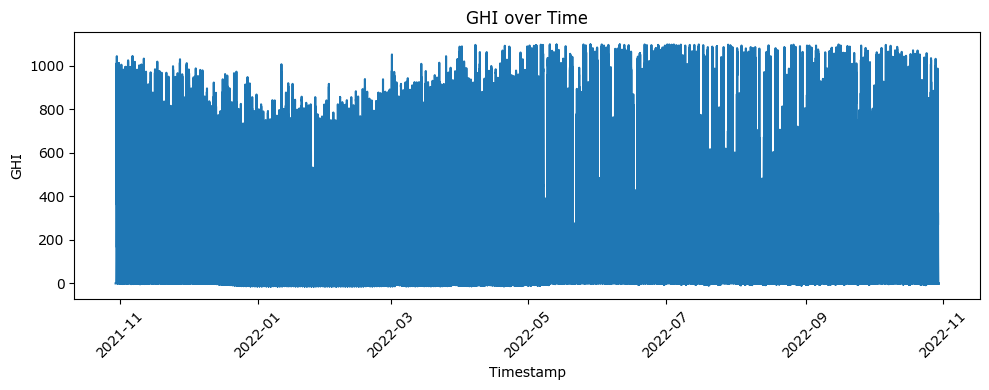

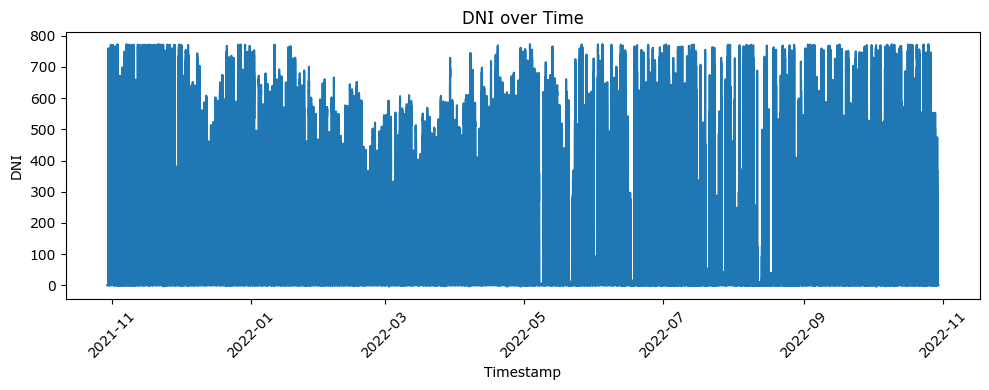

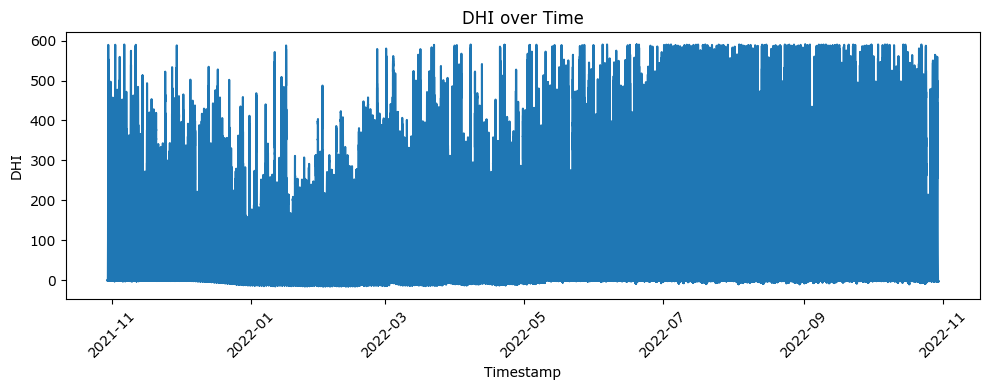

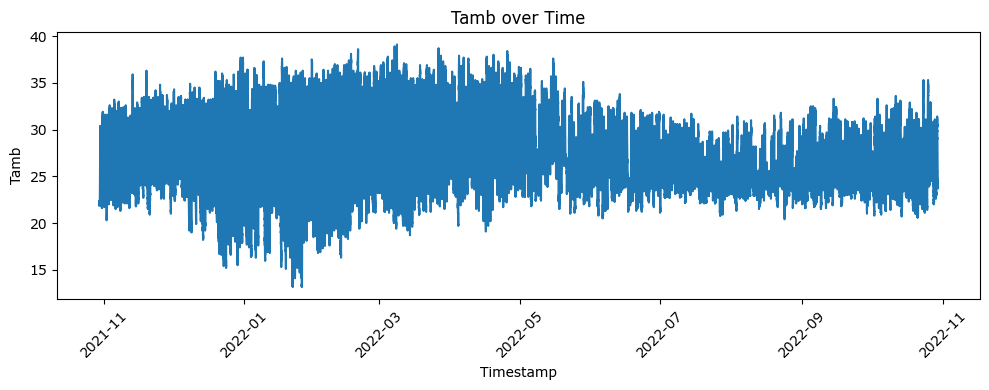

In [11]:
# Attempt to find a time-related column, include 'timestamp' explicitly
time_col = [col for col in data.columns if 'timestamp' in col.lower()]

# Proceed if a time column is found
if time_col:
    data[time_col[0]] = pd.to_datetime(data[time_col[0]])
    time_var = time_col[0]
    for var in ['GHI', 'DNI', 'DHI', 'Tamb']:
        if var in data.columns:
            plt.figure(figsize=(10, 4))
            sns.lineplot(x=time_var, y=var, data=data)
            plt.title(f"{var} over Time")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
else:
    print("No time/date column found.")

# 📌 8. Wind Rose Plot (if 'WD' & 'WS' exist)

In [12]:
data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')

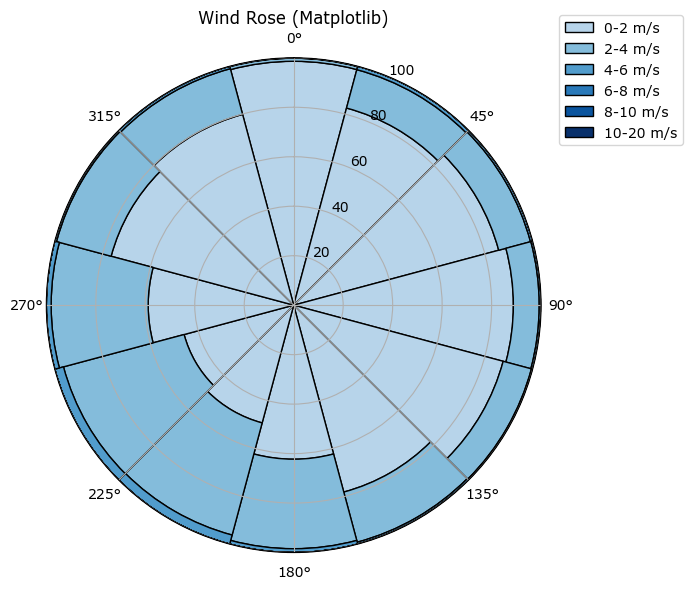

In [13]:
if all(col in data.columns for col in ['WD', 'WS']):
    # Clean data: drop NaNs
    df_wind = data[['WD', 'WS']].dropna()

    # Convert to radians and bin direction into 30-degree intervals
    wd_rad = np.deg2rad(df_wind['WD'])
    wd_bins = np.floor(df_wind['WD'] / 30) * 30  # 12 bins: 0-30, 30-60, ..., 330-360
    ws_bins = pd.cut(df_wind['WS'], bins=[0, 2, 4, 6, 8, 10, 20], labels=False, include_lowest=True)

    # Create a 2D histogram
    counts, xedges, yedges = np.histogram2d(df_wind['WD'], df_wind['WS'],
                                            bins=[np.arange(0, 361, 30), [0, 2, 4, 6, 8, 10, 20]])

    # Normalize per direction for stacked bars
    counts_percent = counts / counts.sum(axis=1, keepdims=True) * 100
    counts_percent = np.nan_to_num(counts_percent)

    # Plot
    angles = np.deg2rad(np.arange(0, 360, 30))
    width = np.deg2rad(30)

    fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(8, 6))

    bottom = np.zeros(len(angles))
    colors = plt.cm.Blues(np.linspace(0.3, 1, counts_percent.shape[1]))

    for i in range(counts_percent.shape[1]):
        bars = ax.bar(angles, counts_percent[:, i], width=width, bottom=bottom,
                      color=colors[i], edgecolor='black', label=f"{[0, 2, 4, 6, 8, 10][i]}-{[2, 4, 6, 8, 10, 20][i]} m/s")
        bottom += counts_percent[:, i]

    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_title("Wind Rose (Matplotlib)")
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()


# 📌 9. Histograms of GHI and WS

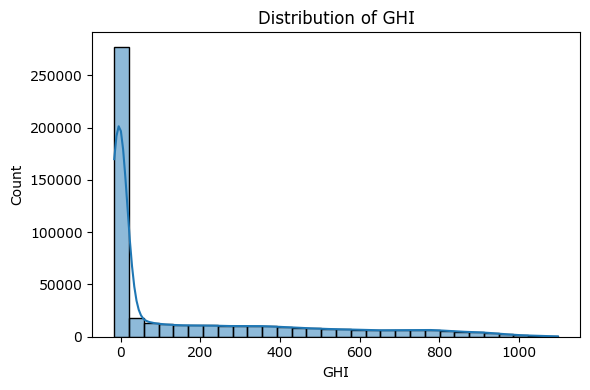

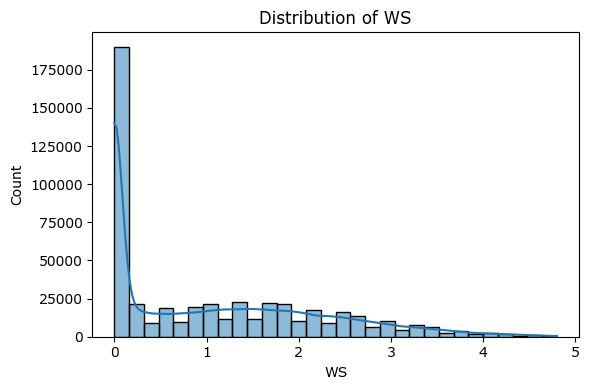

In [14]:
for col in ['GHI', 'WS']:
    if col in data.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(data[col], bins=30, kde=True)
        plt.title(f"Distribution of {col}")
        plt.tight_layout()
        plt.show()


# 📌 10. Scatter plots

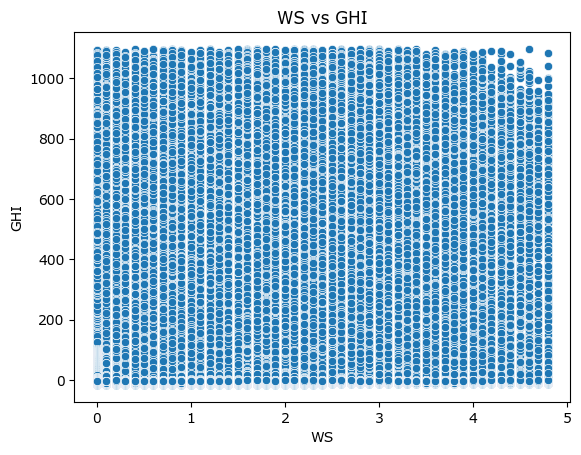

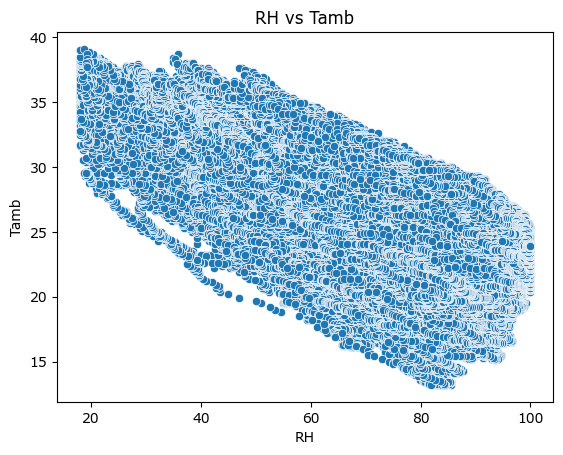

In [15]:
if 'WS' in data.columns and 'GHI' in data.columns:
    sns.scatterplot(data=data, x='WS', y='GHI')
    plt.title("WS vs GHI")
    plt.show()

if 'RH' in data.columns and 'Tamb' in data.columns:
    sns.scatterplot(data=data, x='RH', y='Tamb')
    plt.title("RH vs Tamb")
    plt.show()

# 📌 11. Bubble Plot (GHI vs Tamb, size=RH)

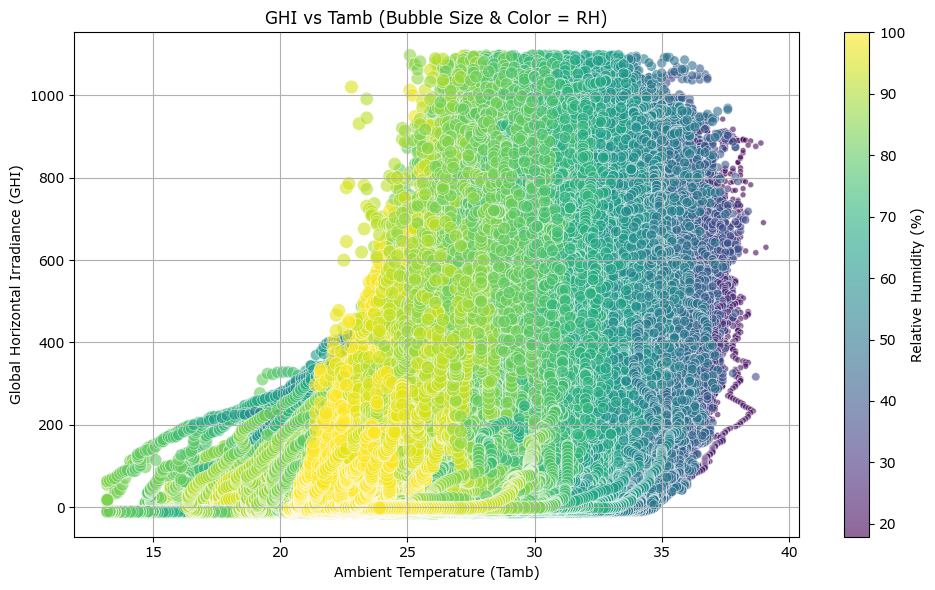

In [16]:
import matplotlib.pyplot as plt

if all(col in data.columns for col in ['GHI', 'Tamb', 'RH']):
    df_bubble = data[['Tamb', 'GHI', 'RH']].dropna()

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        df_bubble['Tamb'], df_bubble['GHI'],
        s=df_bubble['RH'],                     # bubble size
        c=df_bubble['RH'], cmap='viridis',     # color based on RH
        alpha=0.6, edgecolors='w', linewidth=0.5
    )

    plt.colorbar(scatter, label='Relative Humidity (%)')
    plt.xlabel('Ambient Temperature (Tamb)')
    plt.ylabel('Global Horizontal Irradiance (GHI)')
    plt.title('GHI vs Tamb (Bubble Size & Color = RH)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 📌 12. Export cleaned data

In [17]:
data.to_csv("../data/cleaned/benin_clean.csv", index=False)
print("✅ Cleaned data saved.")


✅ Cleaned data saved.
